# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [694]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [555]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [556]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [557]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [558]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-04T13:01:29+0300',
 'created_at': '2023-03-04T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [559]:
data['found']

256

Количество страниц в результатах поиска

In [560]:
data['pages']

26

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [561]:
df = pd.json_normalize(data['items'])
df

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-04T13:01:29+0300,2023-03-04T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,Data Scientist,NaN,False,False,None,None,2023-03-02T17:13:07+0300,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,Белорусская,Замоскворецкая,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,None,None,2023-03-03T16:06:49+0300,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,77075807,False,Data Scientist,NaN,False,False,None,None,2023-03-03T13:58:00+0300,2023-03-03T13:58:00+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7172-7172-it,"Лента, федеральная розничная сеть, IT",NaN
6,77536865,False,Data Scientist Junior/Junior+,NaN,False,False,None,None,2023-03-01T12:08:16+0300,2023-03-01T12:08:16+0300,...,Добрынинская,Кольцевая,5.36,5,55.728994,37.622533,NaN,NaN,NaN,NaN
7,77208642,False,Data Scientist middle+/Senior,NaN,False,False,None,None,2023-03-04T12:06:39+0300,2023-03-04T12:06:39+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,77656659,False,Data Scientist,NaN,False,False,None,None,2023-03-03T16:15:22+0300,2023-03-03T16:15:22+0300,...,Бульвар Дмитрия Донского,Серпуховско-Тимирязевская,9.170,9,55.568201,37.576856,NaN,NaN,NaN,NaN
9,77223284,False,Аналитик данных (Data Scientist) / ML-разработчик,NaN,False,False,None,None,2023-03-01T15:00:20+0300,2023-03-01T15:00:20+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [562]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [563]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

В целях предотвращения перезагрузки данных, верный код ниже закомментирован, а полученные с его помощью данные сохранены в формате json на рабочем устройстве. Краткое описание: делаем запрос к API сайте hh.ru по ключевым словам из "items", по параметру из list'a "roles" и выгружаем вакансии с 0 по 14 страницу, сразу конвертируя данные в pd.DataFrame.

In [564]:
# URL = 'https://api.hh.ru/vacancies'
#
# items = ['машинное обучение', 'ML Инженер', 'ml-engineer', 'Machine Learning', 'Аналитик данных',
#          'Data Analyst', 'Бизнес-аналитик', 'senior ml', 'middle ml', 'junior ml',
#          'ml ops', 'Big data', 'team lead ml', 'deep learning', 'Аналитик', 'research engineer',
#          'Data Scientist']
# pages = list(range(0, 15))
# roles = [156, 10, 150, 164, 165, 134]
#
# all_vacancies = pd.DataFrame()
#
# for item in items:
#     for role in roles:
#         for page in pages:
#             params = {
#                 'text': item,
#                 'area': 1,
#                 'name': "Москва",
#                 'page': page,
#                 'per_page': 30,
#                 'professional_role': role
#             }
#
#             req = requests.get(URL, params)
#             data = json.loads(req.content.decode())
#
#             tmp = pd.json_normalize(data['items'])
#
#             all_vacancies = pd.concat([all_vacancies, tmp], axis=0)
#
#             sleep(0.3)

In [650]:
ds = pd.read_csv("vacancies.json")

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [651]:
ds = ds.iloc[ds.astype(str).drop_duplicates().index]
ds.shape

(5123, 69)

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных (удобная таблица с полным описанием каждой вакансии уже создана ранее; предлагаю обработать данные некоторым образом).

In [652]:
ds.sample(5)

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.lng,department.id,department.name,insider_interview.id,insider_interview.url,salary.from,salary.to,salary.currency,salary.gross,employer.logo_urls
5520,77449739,False,Младший финансовый аналитик (Финансовый департ...,NaN,False,False,NaN,NaN,NaN,NaN,...,37.732117,NaN,NaN,NaN,NaN,90000.0,90000.0,RUR,True,NaN
3978,71317662,False,BI аналитик,NaN,False,False,NaN,NaN,NaN,NaN,...,37.441900,NaN,NaN,30923.0,https://hh.ru/interview/30923?employerId=4219,NaN,NaN,NaN,NaN,NaN
58,77453781,False,Удаленный стажер-аналитик (computer vision),NaN,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5632,72871407,False,Ведущий кредитный аналитик,NaN,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
463,77524218,False,Аналитик Power BI (удаленно),NaN,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Уберём вакансии, находящиеся в архиве:

In [655]:
ds = ds[ds['archived'] == False]

In [656]:
ds.shape

(5122, 69)

И оставим в колонке "professional_roles" только название профессии:

In [657]:
data = ds

data['professional_roles'] = data['professional_roles'].astype(str)
data['professional_roles'] = data['professional_roles'].apply(lambda x: x[1:-1])
data['professional_roles'] = data['professional_roles'].apply(lambda x: eval(x)['name'])

data['professional_roles'].unique()

array(['BI-аналитик, аналитик данных', 'Аналитик', 'Бизнес-аналитик',
       'Продуктовый аналитик', 'Дата-сайентист',
       'Финансовый аналитик, инвестиционный аналитик'], dtype=object)

Всё-таки, есть некоторые профессии, сильно отличающиеся от Data Scientist. Оставим только более подходящие:

In [658]:
data = data[(data['professional_roles'] == 'Аналитик') | (data['professional_roles'] == 'Дата-сайентист')]
data.shape

(2402, 69)

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [659]:
data.to_excel(r'/Users/ex3nd/Learning/DataAnalysis/task4_hh/vacancies_ds.xlsx', index=False)

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [660]:
data.index.size

2402

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Описание требований к кандидату располагается в поле "snippet.requirement".

In [661]:
requirements = pd.Series(data['snippet.requirement']).reset_index()
del requirements['index']
requirements = np.array(requirements).reshape((2402))

Будем подсчитывать количество всех встречающихся слов со всех требований по всем вакансиям:

In [662]:
import re

dict = {}

for req in requirements:
    req = str(req)
    list = re.split(' |, |. |: |; ', req)

    for word in list:
        if word not in dict:
            dict.update({word: 1})
        else:
            val = dict.get(word)
            dict.update({word: val + 1})

In [663]:
sorted(dict.items(), key=lambda x: x[1], reverse=True)

[('', 5700),
 ('Опы', 1633),
 ('работ', 1479),
 ('Знани', 701),
 ('о', 598),
 ('н', 586),
 ('опы', 461),
 ('Высше', 416),
 ('знани', 397),
 ('ил', 331),
 ('лет', 330),
 ('образование', 279),
 ('Умени', 251),
 ('SQL', 240),
 ('Понимани', 226),
 ('анализ', 211),
 ('образовани', 207),
 ('разработк', 205),
 ('област', 200),
 ('<highlighttext>данных</highlighttext>', 192),
 ('п', 189),
 ('владени', 177),
 ('Pytho', 170),
 ('данны', 166),
 ('Уверенно', 162),
 ('данных', 160),
 ('SQ', 159),
 ('работат', 155),
 ('года', 155),
 ('дл', 149),
 ('M', 149),
 ('Python', 137),
 ('<highlighttext>аналитиком</highlighttext', 136),
 ('техническо', 132),
 ('и', 127),
 ('<highlighttext>Data</highlighttext', 126),
 ('принципо', 122),
 ('Exce', 120),
 ('<highlighttext>данных</highlighttext', 120),
 ('Навык', 118),
 ('ле', 118),
 ('алгоритмо', 112),
 ('<highlighttext>машинного</highlighttext', 109),
 ('умени', 109),
 ('Excel', 108),
 ('осно', 105),
 ('мене', 105),
 ('Powe', 105),
 ('2-', 103),
 ('понимани', 1

А также посмотрим, сколько лет опыта работы требуется больше всего:

In [664]:
new_dict = {}

for req in requirements:
    req = str(req)
    list = re.split(' |, |. |: |; ', req)

    for word in list:
        if len(word) == 1:
            if word not in new_dict:
                new_dict.update({word: 1})
            else:
                val = new_dict.get(word)
                new_dict.update({word: val + 1})
sorted(new_dict.items(), key=lambda x: x[1], reverse=True)

[('о', 598),
 ('н', 586),
 ('п', 189),
 ('M', 149),
 ('и', 127),
 ('o', 69),
 ('t', 50),
 ('1', 45),
 ('(', 44),
 ('i', 44),
 ('3', 43),
 ('2', 42),
 ('B', 40),
 ('И', 35),
 ('с', 34),
 ('I', 33),
 ('D', 25),
 ('д', 24),
 ('П', 24),
 ('a', 19),
 ('В', 17),
 ('Б', 17),
 ('Н', 14),
 ('R', 13),
 ('О', 13),
 ('4', 12),
 ('A', 11),
 ('т', 10),
 ('е', 10),
 ('Т', 10),
 ('б', 10),
 ('в', 9),
 ('C', 9),
 ('з', 8),
 ('С', 5),
 ('-', 5),
 ('м', 5),
 ('ж', 4),
 ('К', 4),
 ('А', 3),
 ('*', 2),
 ('"', 2),
 ('H', 2),
 ('«', 2),
 ('У', 2),
 ('ч', 1),
 ('М', 1),
 ('Ф', 1),
 ('U', 1),
 (')', 1),
 ('J', 1),
 ('Л', 1),
 ('+', 1),
 ('u', 1),
 ('Х', 1),
 ('w', 1),
 ('5', 1),
 ('E', 1),
 ('Р', 1),
 ('d', 1),
 ('S', 1),
 ('9', 1),
 ('Д', 1),
 ('b', 1),
 ('T', 1)]

Исследуя приведённые выше данные, мы можем взять следующие наиболее встречающиеся навыки и построить гистограмму:

In [665]:
array = pd.Series(0, index=['опыт', 'образование', 'SQL', 'Python', 'Excel', 'алгоритм', 'статистик', 'машинного', 'ML', 'BI', 'pandas', 'sklearn', 'PyTorch', 'numpy', 'английского', 'Spark', 'МФТИ', 'Hadoop', 'matplot', 'scipy', 'Query', 'R', 'Tableau', 'Power']).astype(int)

for req in requirements:
    req = str(req)

    for word in array.index:
        if word in req:
            array[word] += 1

array = array.sort_values(ascending=False)[0:16]

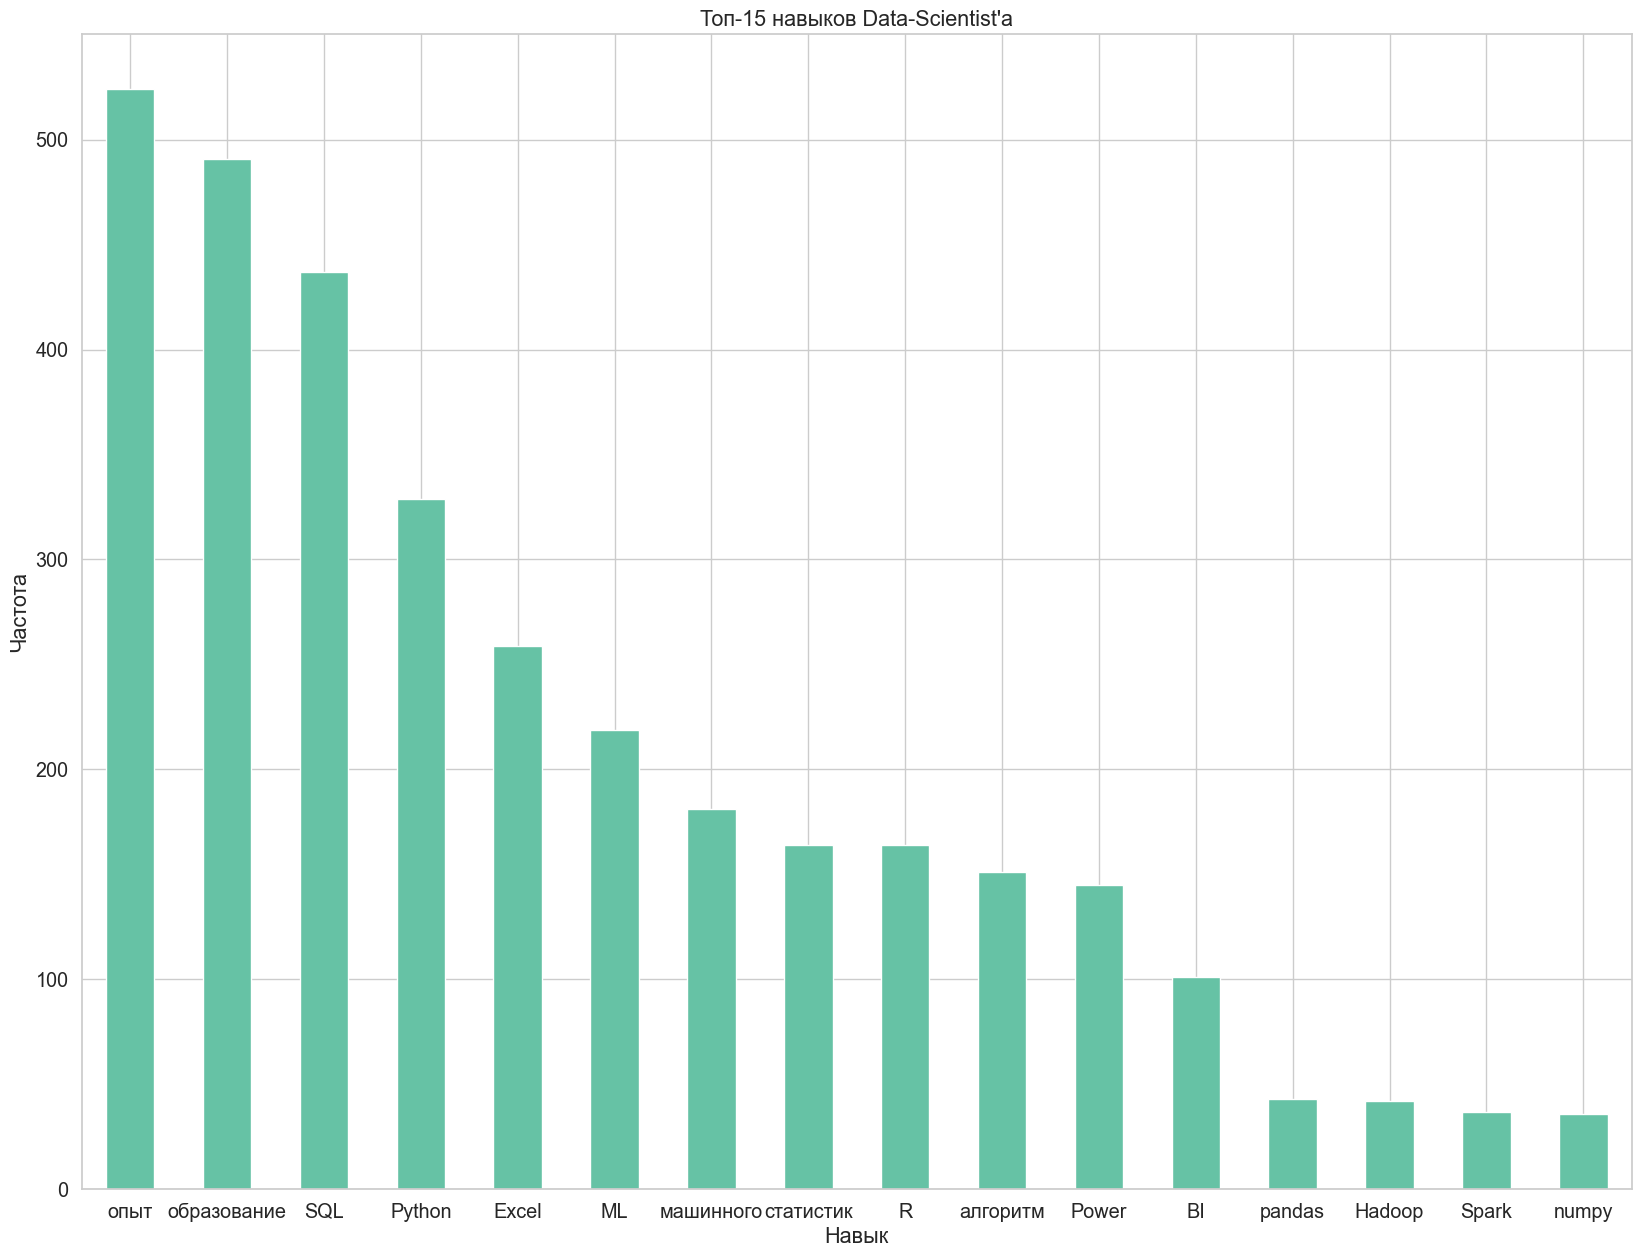

In [666]:
plt.figure(figsize=(20, 15))

ax = array.plot.bar(rot=0)

plt.title("Топ-15 навыков Data-Scientist'a")
plt.xlabel("Навык")
plt.ylabel("Частота")

plt.show()

Мы видим, что опыт работы играет важнейшую роль при оценивании кандидата. Появляется резон взглянуть на его продолжительность.

In [667]:
array = pd.Series(0, index=['1', '2', '3', '4', '5']).astype(int)

for req in requirements:
    req = str(req)

    for word in array.index:
        if word in req:
            array[word] += 1

array = array.sort_values(ascending=False)

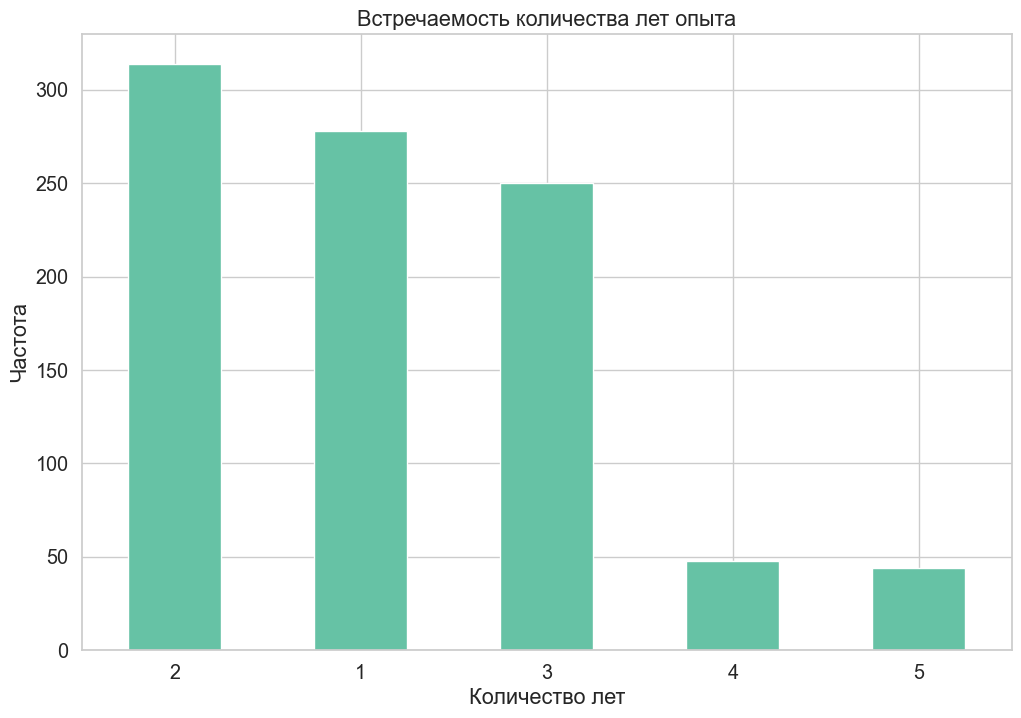

In [668]:
plt.figure(figsize=(12, 8))

ax = array.plot.bar(rot=0)

plt.title("Встречаемость количества лет опыта")
plt.xlabel("Количество лет")
plt.ylabel("Частота")

plt.show()

Ясно, что цифры и числа, встречающиеся в вакансии, как правило, обозначают требуемый опыт работы.

Исследуя полученный топ, составляем следующий топ 15 требуемых навыков:

1. Опыт работы от 1 до 3 лет
2. Высшее техническое, экономическое образование
3. SQL, реляционные базы данных
4. Python
5. Excel
6. Машинное обучение
7. Математическая статистика
8. R
9. Алгоритмы
10. Power Point
11. BI
12. Pandas
13. Hadoop
14. Spark
15. Numpy

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Курс валют на момент 4 марта 00:35:
1 доллар = 75,54 рублей
1 евро = 80,31 рублей

В колонке 'salary' пусто

In [669]:
data['salary'].unique()

array([nan])

Но существует вилка зарплат почти для каждой вакансии. Переведём все значения в рубли. На пропуски внимание обращать не будем, так как plt.bar не должен их учитывать.

In [670]:
fix_dollar = data[(data['salary.currency'] == 'USD') & (data['salary.from'] != 'NaN') & (data['salary.to'] != 'NaN')]
fix_dollar['salary.to'] = fix_dollar['salary.to'].apply(lambda x: x * 75,54)
fix_dollar['salary.from'] = fix_dollar['salary.from'].apply(lambda x: x * 75,54)

fix_euro = data[(data['salary.currency'] == 'EUR') & (data['salary.from'] != 'NaN') & (data['salary.to'] != 'NaN')]
fix_euro['salary.to'] = fix_euro['salary.to'].apply(lambda x: x * 80,31)
fix_euro['salary.from'] = fix_euro['salary.from'].apply(lambda x: x * 80,31)

indeces = fix_dollar.index
tmp_data = data.drop(index=indeces)
data = pd.concat([tmp_data, fix_dollar], axis=0)

indeces = fix_euro.index
tmp_data = data.drop(index=indeces)
concat_data = pd.concat([tmp_data, fix_euro], axis=0)

concat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402 entries, 23 to 5782
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2402 non-null   int64  
 1   premium                      2402 non-null   bool   
 2   name                         2402 non-null   object 
 3   department                   0 non-null      float64
 4   has_test                     2402 non-null   bool   
 5   response_letter_required     2402 non-null   bool   
 6   salary                       0 non-null      float64
 7   address                      0 non-null      float64
 8   response_url                 1 non-null      object 
 9   sort_point_distance          0 non-null      float64
 10  published_at                 2402 non-null   object 
 11  created_at                   2402 non-null   object 
 12  archived                     2402 non-null   bool   
 13  apply_alternate_u

/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_6769/1811878070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_dollar['salary.to'] = fix_dollar['salary.to'].apply(lambda x: x * 75,54)
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_6769/1811878070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_dollar['salary.from'] = fix_dollar['salary.from'].apply(lambda x: x * 75,54)
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_6769/1811878070.py:6: SettingWithCopyWarn

In [671]:
gross_data = concat_data[concat_data['salary.gross'] == True]
net_data = concat_data[concat_data['salary.gross'] == False]

mean_from_gross = gross_data['salary.from'].mean()
mean_to_gross = gross_data['salary.to'].mean()

median_from_gross = gross_data['salary.from'].median()
median_to_gross = gross_data['salary.to'].median()

mod_from_gross = gross_data['salary.from'].value_counts().idxmax()
mod_to_gross = gross_data['salary.from'].value_counts().idxmax()

mean_from_net = net_data['salary.from'].mean()
mean_to_net = net_data['salary.to'].mean()

median_from_net = net_data['salary.from'].median()
median_to_net = net_data['salary.to'].median()

mod_from_net = net_data['salary.from'].value_counts().idxmax()
mod_to_net = net_data['salary.from'].value_counts().idxmax()

Теперь предлагаю визуализировать статистические значения по минимальной заработной плате, используя plt.bar:

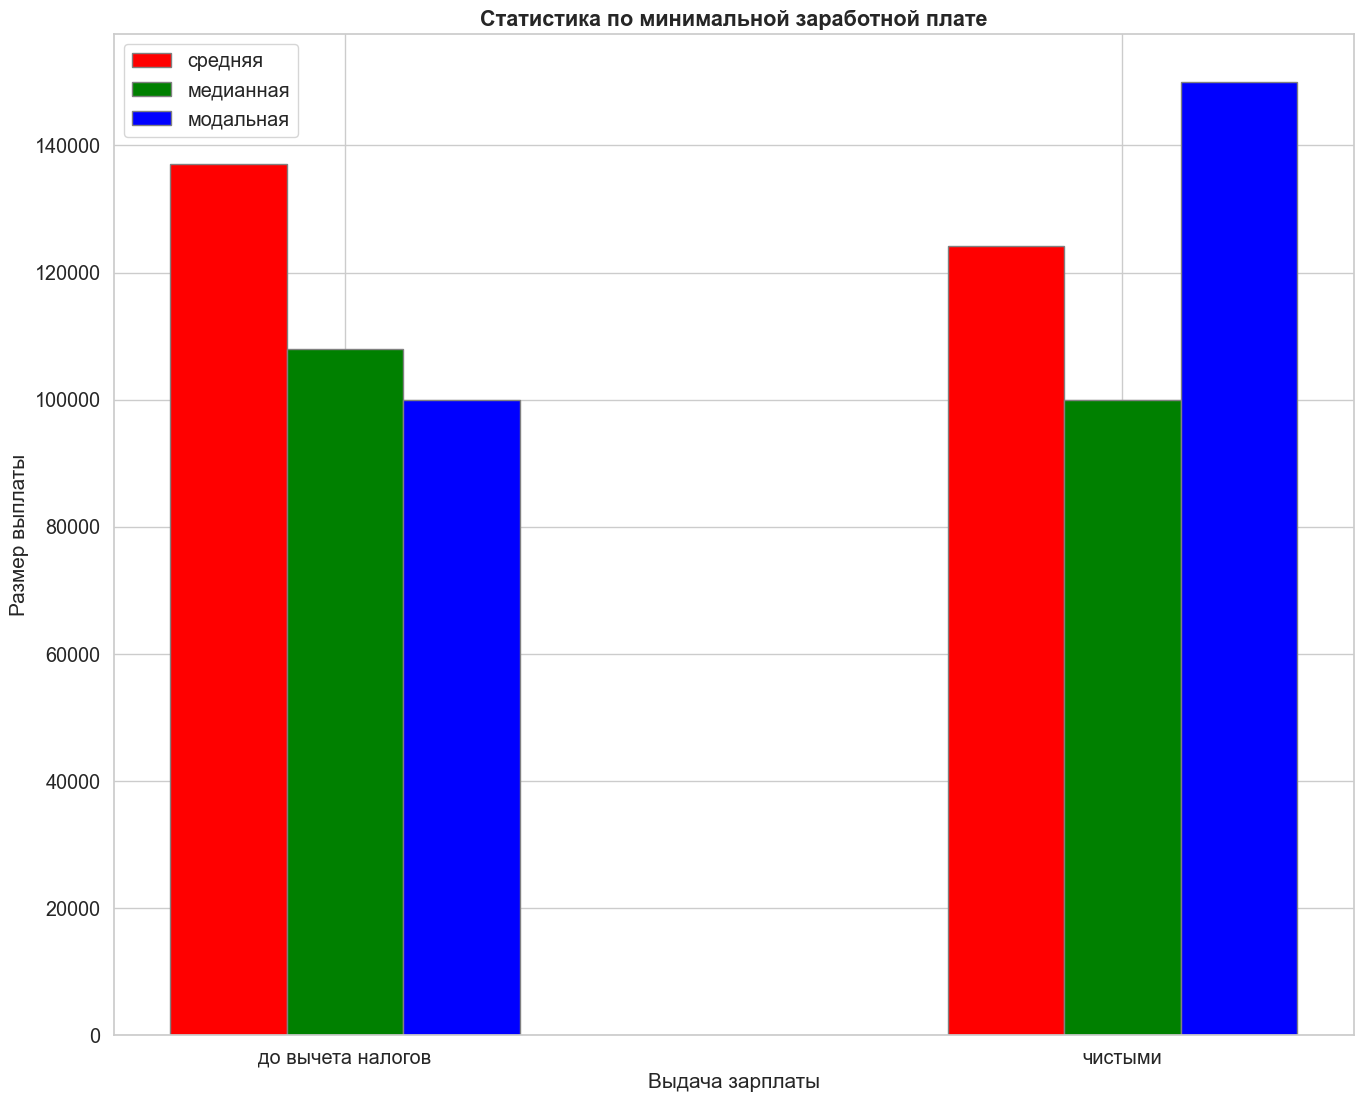

In [672]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(16, 13))

# set height of bar
mean_from = [mean_from_gross, mean_from_net]
median_from = [median_from_gross, median_from_net]
mod_from = [mod_from_gross, mod_from_net]

# Set position of bar on X axis
br1 = np.arange(len(mean_from))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, mean_from, color ='r', width = barWidth,
        edgecolor ='grey', label ='средняя')
plt.bar(br2, median_from, color ='g', width = barWidth,
        edgecolor ='grey', label ='медианная')
plt.bar(br3, mod_from, color ='b', width = barWidth,
        edgecolor ='grey', label ='модальная')

# Adding Xticks
plt.title("Статистика по минимальной заработной плате", fontweight='bold')
plt.xlabel('Выдача зарплаты', fontsize = 15)
plt.ylabel('Размер выплаты', fontsize = 15)
plt.xticks([r + barWidth for r in br1], ['до вычета налогов', 'чистыми'])

plt.legend()
plt.show()

Теперь посмотрим на те же показатели, но по верхней планке заработной платы:

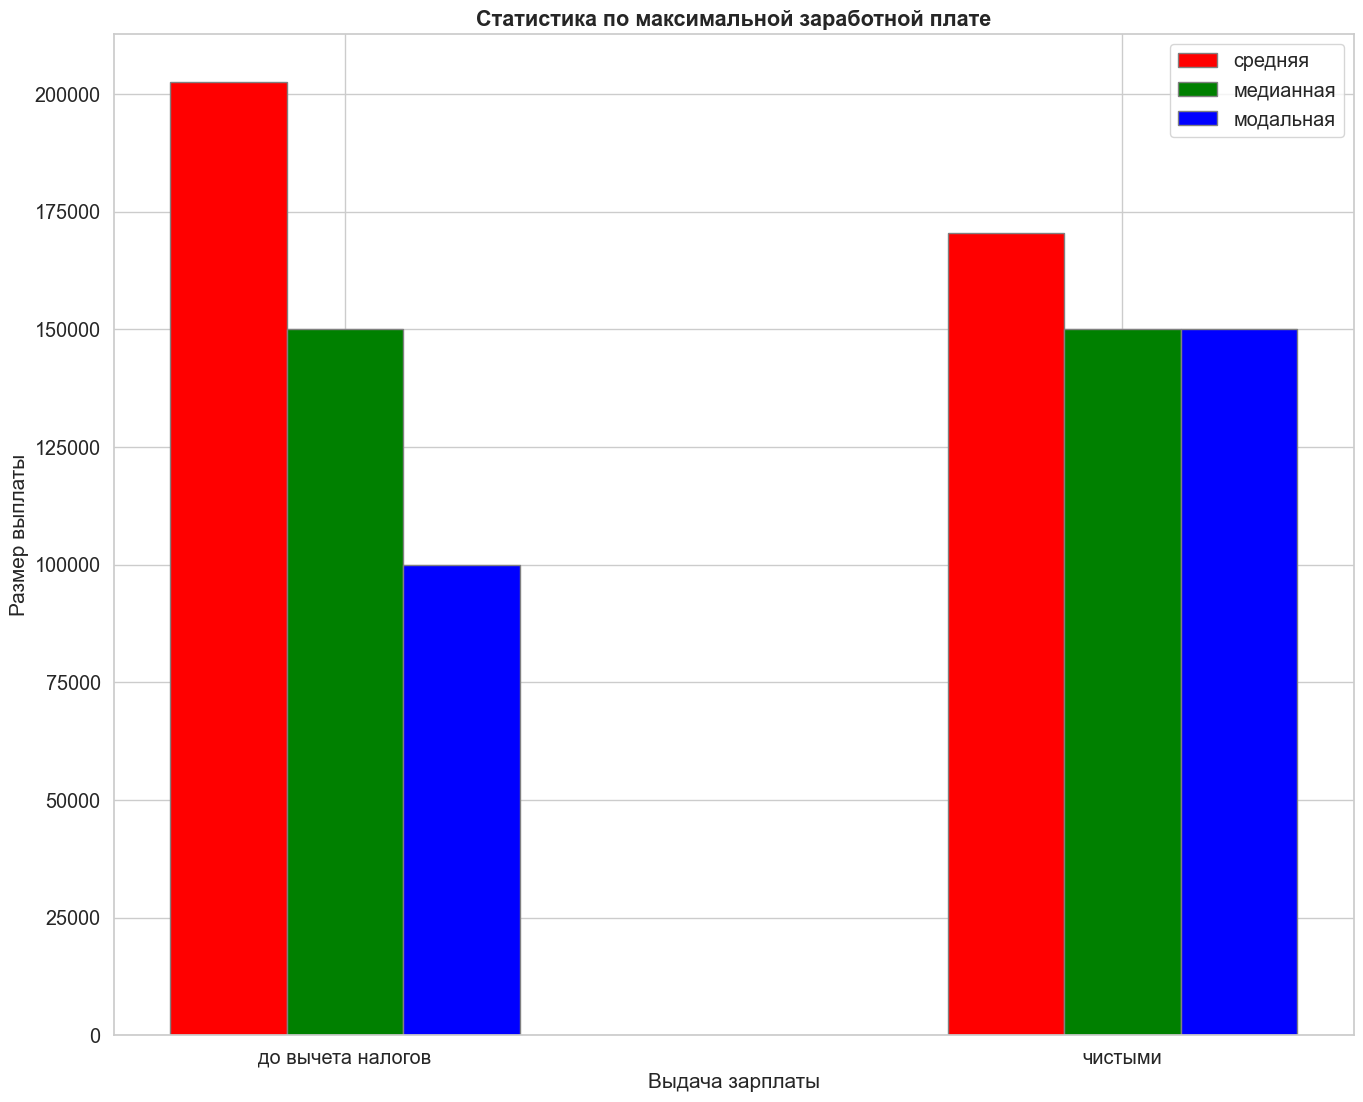

In [673]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(16, 13))

# set height of bar
mean_to = [mean_to_gross, mean_to_net]
median_to = [median_to_gross, median_to_net]
mod_to = [mod_to_gross, mod_to_net]

# Set position of bar on X axis
br1 = np.arange(len(mean_to))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, mean_to, color ='r', width = barWidth,
        edgecolor ='grey', label ='средняя')
plt.bar(br2, median_to, color ='g', width = barWidth,
        edgecolor ='grey', label ='медианная')
plt.bar(br3, mod_to, color ='b', width = barWidth,
        edgecolor ='grey', label ='модальная')

# Adding Xticks
plt.title("Статистика по максимальной заработной плате", fontweight='bold')
plt.xlabel('Выдача зарплаты', fontsize = 15)
plt.ylabel('Размер выплаты', fontsize = 15)
plt.xticks([r + barWidth for r in br1], ['до вычета налогов', 'чистыми'])

plt.legend()
plt.show()

Выводы:

1. Количество вакансий в Москве по направлению Data Science приличное количество (порядка 2400)
2. Для того, чтобы успешно пройти на позицию Data Science, требуется иметь высшее техническое образование, а также средний опыт работы в купе с умением пользоваться инструментами визуализации данных и обучения моделей
3. Заработная плата чистыми в среднем и по медиане, ожидаемо, ниже, чем зар-плата до вычета налогов как по нижней границе вилки, так и по верхней. Однако как на первом графике, так и на втором, самое часто встречающееся значение выше. В среднем же, заработная плата специалиста с хорошим стажем варьируется от 125к --- 140к до 175к --- 200к, что говорит о том, что люди этой профессии ценятся работодателями и есть не малое количество задач, требующих компетенций Data Scientist'a.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

Будем исследовать вакансии по профессии разработчик на C, C++ в Москве, поскольку большинство вакансий именно здесь.

In [587]:
URL = 'https://api.hh.ru/vacancies'

items = ['c++', 'junior c++', 'middle c++', 'senior c++', 'разработчик c++', 'highload', 'ведущий c++', 'разработчик C', 'программист c++', 'developer c++']
pages = range(0, 15)

dev = pd.DataFrame()

for item in items:
    for page in pages:
        params = {
            'text': item,
            'area': 1,
            'name': "Москва",
            'page': page,
            'per_page': 30,
        }

        req = requests.get(URL, params)
        data = json.loads(req.content.decode())

        tmp = pd.json_normalize(data['items'])

        dev = pd.concat([dev, tmp], axis=0)

        sleep(0.1)

In [674]:
dev.shape

(3597, 69)

Удалим дубликаты:

In [675]:
data = dev
data = data.iloc[data.astype(str).drop_duplicates().index]
data.shape

(2103, 69)

Удалим вакансии, находящиеся в архиве:

In [676]:
data = data[data['archived'] == False]
data.shape

(2103, 69)

Распарсим колонку "professional_roles":

In [677]:
data['professional_roles'] = data['professional_roles'].astype(str)
data['professional_roles'] = data['professional_roles'].apply(lambda x: x[1:-1])
data['professional_roles'] = data['professional_roles'].apply(lambda x: eval(x)['name'])

data['professional_roles'].unique()

array(['Программист, разработчик',
       'Специалист по информационной безопасности'], dtype=object)

Сгрузим подготовленные данные в формат xlsx:

In [678]:
data.to_excel(r'/Users/ex3nd/Learning/DataAnalysis/task4_hh/vacancies_dev.xlsx', index=False)

Узнаем количество доступных вакансий:

In [679]:
data.index.size

2103

Также, как и в прошлом случае, исследуем требуемые навыки разработчика:

In [680]:
requirements = pd.Series(data['snippet.requirement']).reset_index()
del requirements['index']
requirements = np.array(requirements).reshape((2103))

In [681]:
dict = {}

for req in requirements:
    req = str(req)
    list = re.split(' |, |. |: |; ', req)

    for word in list:
        if word not in dict:
            dict.update({word: 1})
        else:
            val = dict.get(word)
            dict.update({word: val + 1})

In [682]:
sorted(dict.items(), key=lambda x: x[1], reverse=True)

[('', 4789),
 ('Опы', 1689),
 ('разработк', 1321),
 ('знани', 1192),
 ('работ', 985),
 ('Знани', 831),
 ('н', 771),
 ('<highlighttext>С++</highlighttext>', 557),
 ('Хороше', 429),
 ('<highlighttext>C++</highlighttext', 423),
 ('STL', 358),
 ('приложений', 350),
 ('<highlighttext>C++</highlighttext>', 349),
 ('опы', 345),
 ('Уверенны', 344),
 ('Linux', 287),
 ('архитектур', 283),
 ('<highlighttext>С++</highlighttext', 283),
 ('ил', 282),
 ('понимани', 281),
 ('Экспертиз', 280),
 ('продуктово', 280),
 ('многопоточно', 279),
 ('по', 278),
 ('алгоритмо', 277),
 ('образование', 277),
 ('Понимани', 272),
 ('Linu', 218),
 ('О', 218),
 ('Отлично', 216),
 ('уровн', 215),
 ('Умени', 213),
 ('Высше', 213),
 ('<highlighttext>С++</highlighttext>11', 212),
 ('навык', 212),
 ('разработки', 212),
 ('стандартны', 212),
 ('системам', 211),
 ('Уверенно', 211),
 ('многопоточны', 211),
 ('Работ', 207),
 ('умени', 207),
 ('техническо', 206),
 ('библиотек', 205),
 ('проектирования', 202),
 ('о', 202),
 ('o',

In [683]:
new_dict = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0}
list = ['1', '2', '3', '4', '5']

for req in requirements:
    req = str(req)

    for word in list:
        if word in req:
            val = new_dict.get(word)
            new_dict.update({word: val + 1})
sorted(new_dict.items(), key=lambda x: x[1], reverse=True)

[('1', 570), ('2', 212), ('3', 201), ('4', 145), ('5', 0)]

In [684]:
array = pd.Series(0, index=['Опыт', 'C++', 'STL', 'прилож', 'Linux', 'многопоточ','алгоритм', 'образован'
                            'metaprogramming', 'Atomic', 'POSIX', 'высоконагруженны', 'QT',
                            'распределён', 'СУБД', 'Windows', 'SQL', 'Python', 'B1+', 'ООП', 'Go'
                            'assembler', 'Android', 'ARM', 'NEON', 'VPF', 'SSE','AVX',
                            'сетев']).astype(int)

for req in requirements:
    req = str(req)

    for word in array.index:
        if word in req:
            array[word] += 1

array = array.sort_values(ascending=False)[0:15]

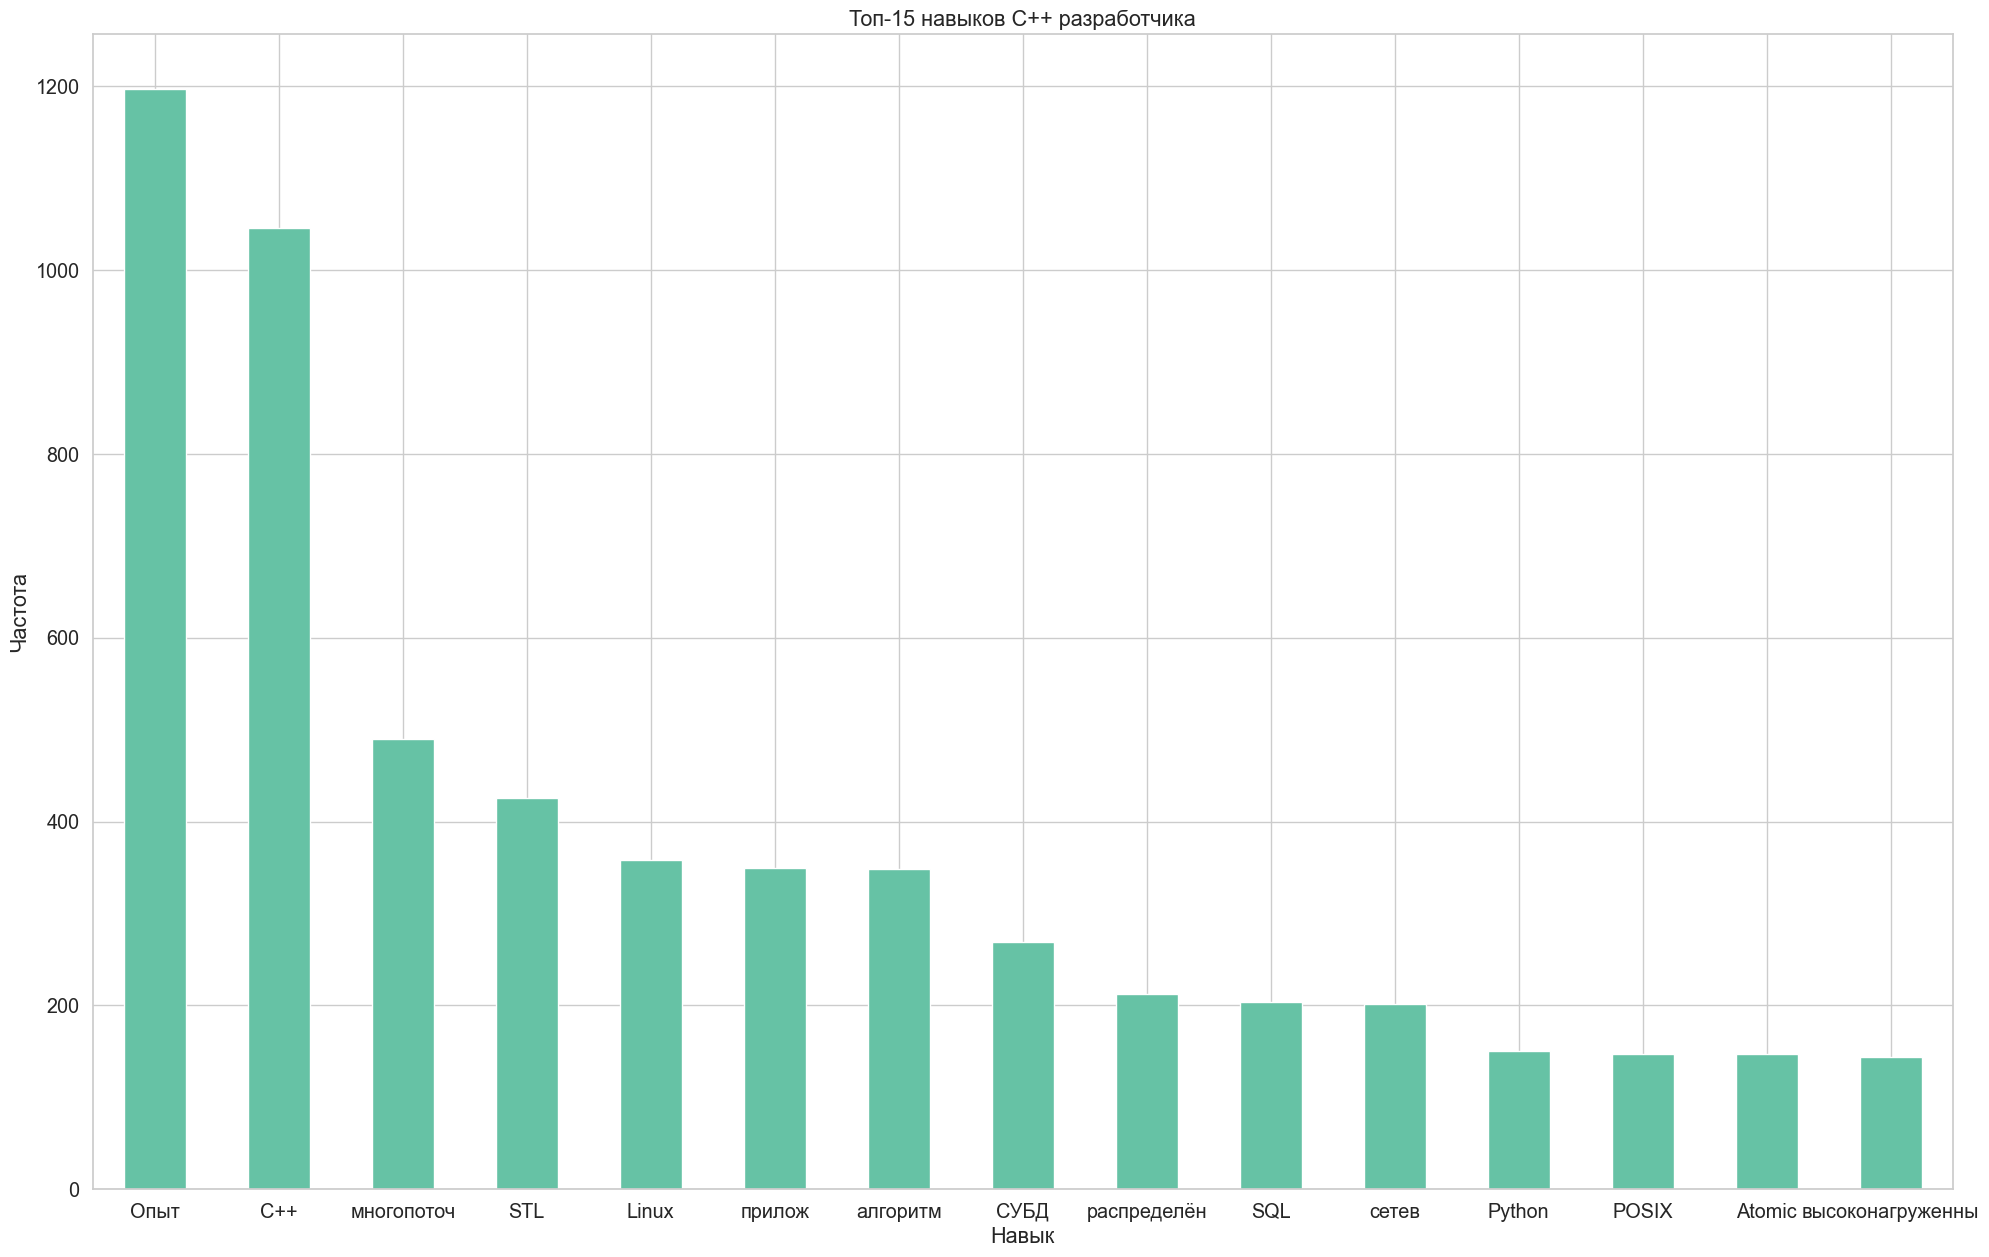

In [685]:
plt.figure(figsize=(24, 15))

ax = array.plot.bar(rot=0)

plt.title("Топ-15 навыков C++ разработчика")
plt.xlabel("Навык")
plt.ylabel("Частота")

plt.show()

In [686]:
array = pd.Series(0, index=['1', '2', '3', '4', '5']).astype(int)

for req in requirements:
    req = str(req)

    for word in array.index:
        if word in req:
            array[word] += 1

array = array.sort_values(ascending=False)

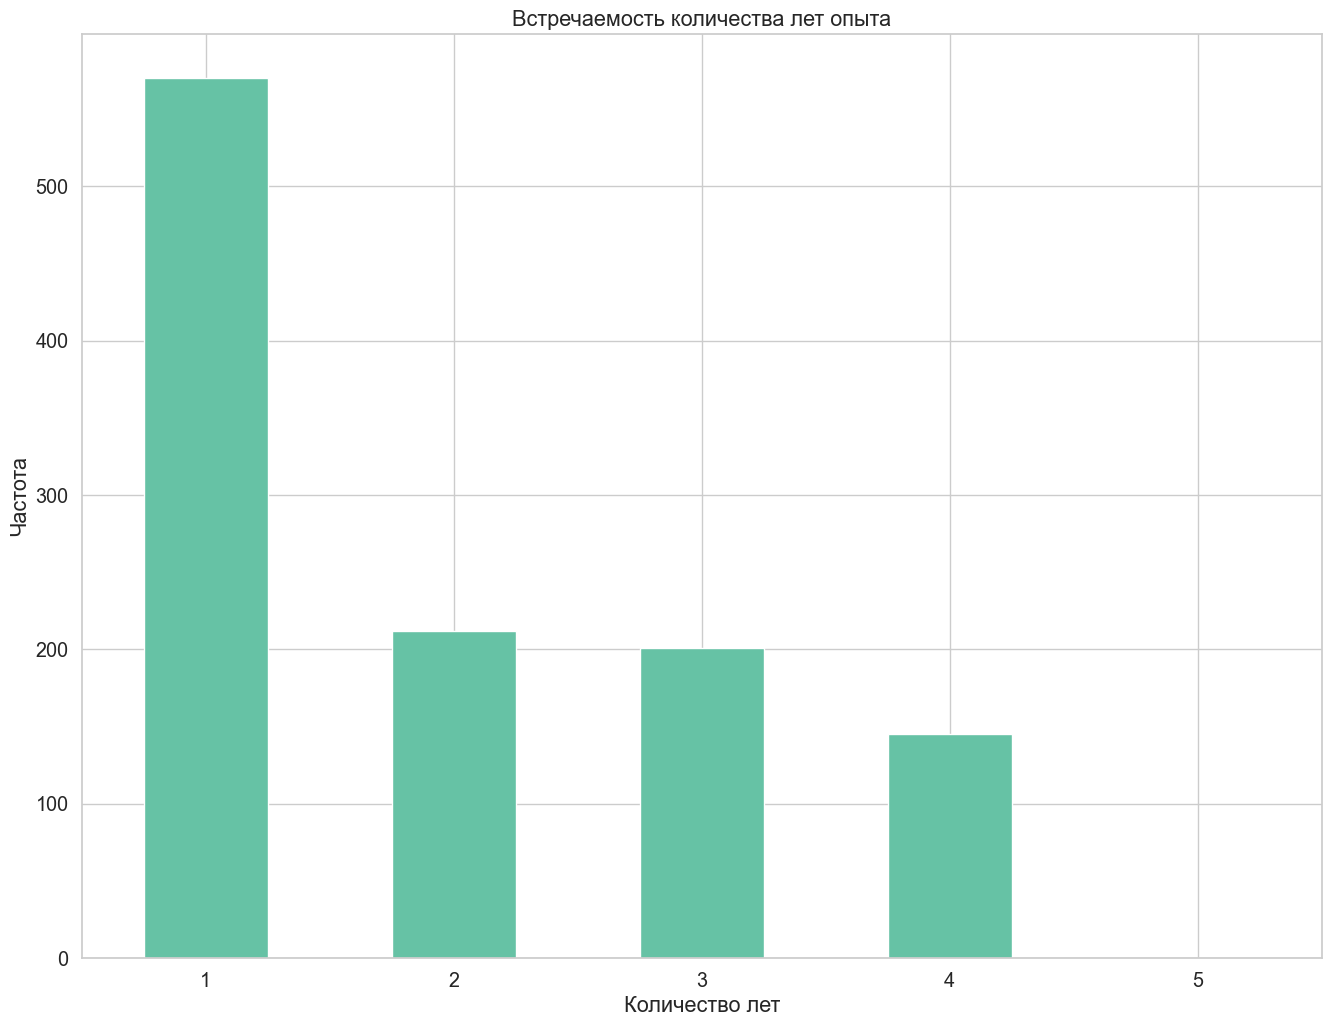

In [687]:
plt.figure(figsize=(16, 12))

ax = array.plot.bar(rot=0)

plt.title("Встречаемость количества лет опыта")
plt.xlabel("Количество лет")
plt.ylabel("Частота")

plt.show()

Имеем следующий топ-15 навыков:

1. Опыт работы от 1 до 4 лет
2. С++
3. Опыт написания многопоточного кода
4. Знание библиотеки STL
5. Знание Linux
6. Опыт разработки крупных промышленных приложений
7. Знание алгоритмов и структур данных
8. Знание СУБД и работа с ними
9. Владение распределёнными системами
10. SQL
11. Сетевые протоколы
12. Python
13. POSIX API
14. Python
15. Highload

Теперь так же исследуем заработную плату:

In [688]:
data['salary'].unique()

array([nan])

In [689]:
fix_dollar = data[(data['salary.currency'] == 'USD') & (data['salary.from'] != 'NaN') & (data['salary.to'] != 'NaN')]
fix_dollar['salary.to'] = fix_dollar['salary.to'].apply(lambda x: x * 75,54)
fix_dollar['salary.from'] = fix_dollar['salary.from'].apply(lambda x: x * 75,54)

fix_euro = data[(data['salary.currency'] == 'EUR') & (data['salary.from'] != 'NaN') & (data['salary.to'] != 'NaN')]
fix_euro['salary.to'] = fix_euro['salary.to'].apply(lambda x: x * 80,31)
fix_euro['salary.from'] = fix_euro['salary.from'].apply(lambda x: x * 80,31)

indeces = fix_dollar.index
tmp_data = data.drop(index=indeces)
data = pd.concat([tmp_data, fix_dollar], axis=0)

indeces = fix_euro.index
tmp_data = data.drop(index=indeces)
concat_data = pd.concat([tmp_data, fix_euro], axis=0)

concat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2103 entries, 0 to 23
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2103 non-null   object 
 1   premium                      2103 non-null   bool   
 2   name                         2103 non-null   object 
 3   department                   0 non-null      object 
 4   has_test                     2103 non-null   bool   
 5   response_letter_required     2103 non-null   bool   
 6   address                      0 non-null      float64
 7   response_url                 0 non-null      object 
 8   sort_point_distance          0 non-null      object 
 9   published_at                 2103 non-null   object 
 10  created_at                   2103 non-null   object 
 11  archived                     2103 non-null   bool   
 12  apply_alternate_url          2103 non-null   object 
 13  insider_interview   

/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_6769/1811878070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_dollar['salary.to'] = fix_dollar['salary.to'].apply(lambda x: x * 75,54)
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_6769/1811878070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fix_dollar['salary.from'] = fix_dollar['salary.from'].apply(lambda x: x * 75,54)
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_6769/1811878070.py:6: SettingWithCopyWarn

In [690]:
gross_data = concat_data[concat_data['salary.gross'] == True]
net_data = concat_data[concat_data['salary.gross'] == False]

mean_from_gross = gross_data['salary.from'].mean()
mean_to_gross = gross_data['salary.to'].mean()

median_from_gross = gross_data['salary.from'].median()
median_to_gross = gross_data['salary.to'].median()

mod_from_gross = gross_data['salary.from'].value_counts().idxmax()
mod_to_gross = gross_data['salary.from'].value_counts().idxmax()

mean_from_net = net_data['salary.from'].mean()
mean_to_net = net_data['salary.to'].mean()

median_from_net = net_data['salary.from'].median()
median_to_net = net_data['salary.to'].median()

mod_from_net = net_data['salary.from'].value_counts().idxmax()
mod_to_net = net_data['salary.from'].value_counts().idxmax()

Строим гистограммы для нижней границы вилки:

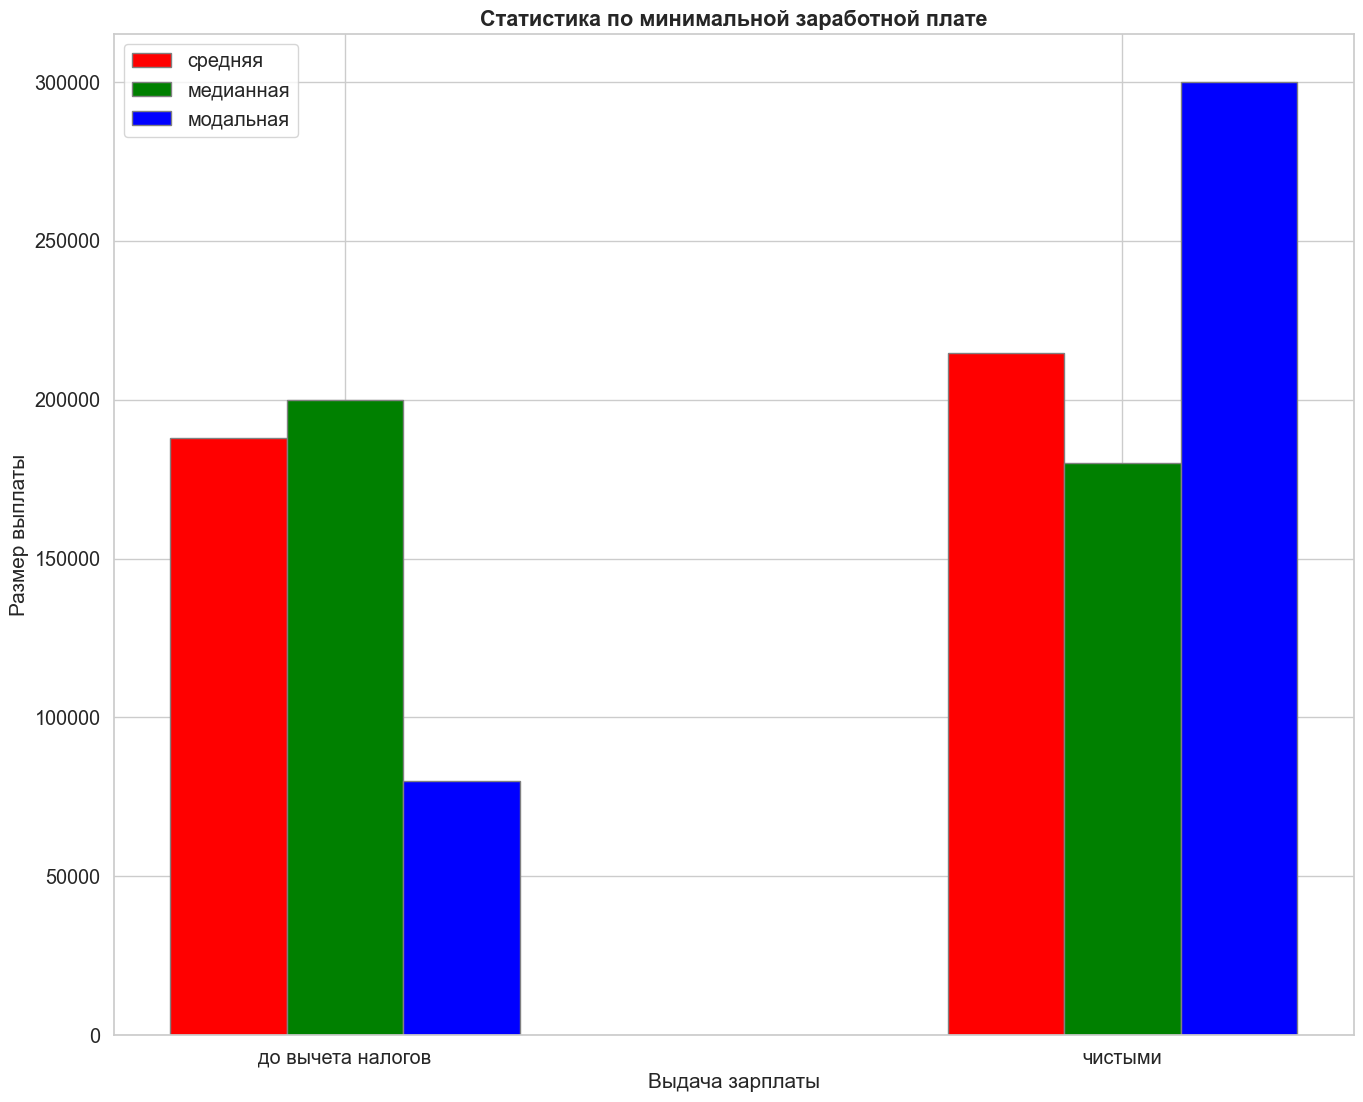

In [691]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(16, 13))

# set height of bar
mean_from = [mean_from_gross, mean_from_net]
median_from = [median_from_gross, median_from_net]
mod_from = [mod_from_gross, mod_from_net]

# Set position of bar on X axis
br1 = np.arange(len(mean_from))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, mean_from, color ='r', width = barWidth,
        edgecolor ='grey', label ='средняя')
plt.bar(br2, median_from, color ='g', width = barWidth,
        edgecolor ='grey', label ='медианная')
plt.bar(br3, mod_from, color ='b', width = barWidth,
        edgecolor ='grey', label ='модальная')

# Adding Xticks
plt.title("Статистика по минимальной заработной плате", fontweight='bold')
plt.xlabel('Выдача зарплаты', fontsize = 15)
plt.ylabel('Размер выплаты', fontsize = 15)
plt.xticks([r + barWidth for r in br1], ['до вычета налогов', 'чистыми'])

plt.legend()
plt.show()

И для верхней границы вилки:

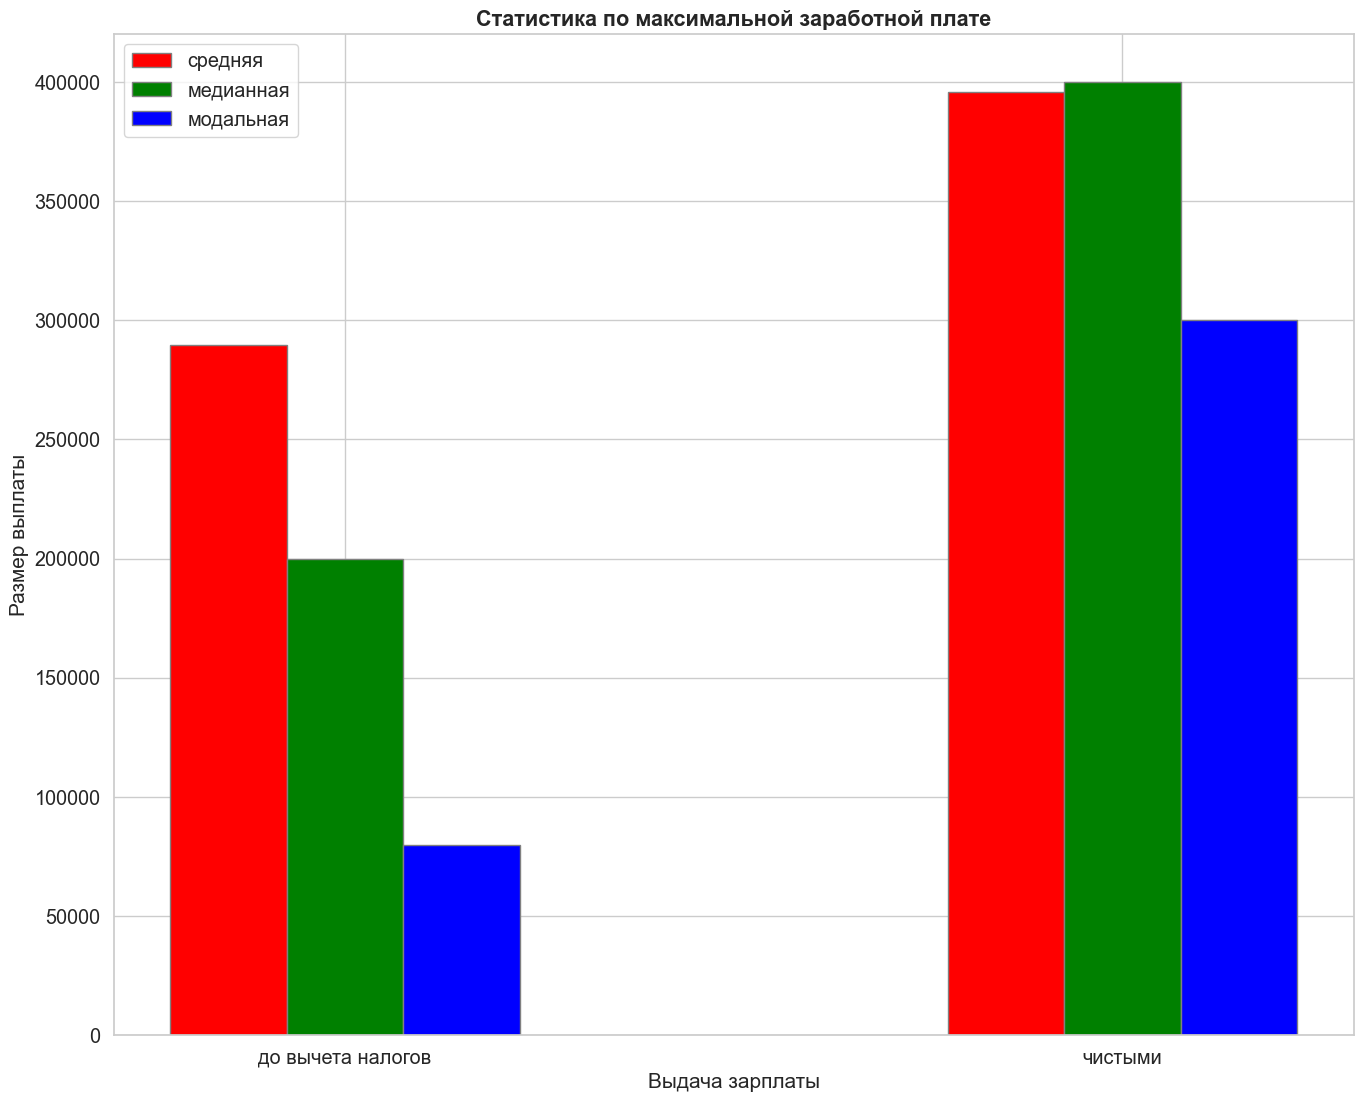

In [692]:
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(16, 13))

# set height of bar
mean_to = [mean_to_gross, mean_to_net]
median_to = [median_to_gross, median_to_net]
mod_to = [mod_to_gross, mod_to_net]

# Set position of bar on X axis
br1 = np.arange(len(mean_to))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, mean_to, color ='r', width = barWidth,
        edgecolor ='grey', label ='средняя')
plt.bar(br2, median_to, color ='g', width = barWidth,
        edgecolor ='grey', label ='медианная')
plt.bar(br3, mod_to, color ='b', width = barWidth,
        edgecolor ='grey', label ='модальная')

# Adding Xticks
plt.title("Статистика по максимальной заработной плате", fontweight='bold')
plt.xlabel('Выдача зарплаты', fontsize = 15)
plt.ylabel('Размер выплаты', fontsize = 15)
plt.xticks([r + barWidth for r in br1], ['до вычета налогов', 'чистыми'])

plt.legend()
plt.show()

Получается так, что зар-плата до вычета налогов и чистыми либо соизмеримы в среднем и по медиане, либо чистыми зп даже больше; при этом верхняя планка по этим показателям сильно превосходит выдачу до вычета налогов. Что касается до модальной зп, то чистыми она значительно выше как по нижней планке, так и по верхней.

Выводы:

1. Количество вакансий по направлению разработки приложений и высоконагруженных сервисов довольно большое число, а именно около 2100
2. Для того, чтобы успешно пройти на позицию C++ developer, требуется иметь высшее техническое образование, а также хорошие знания инструментов.
3. В отличие от Data Science средняя зар-плата разработчика варьируется от 190к --- 210к до 290к --- 400к, что ощутимо больше. В то же время это означает, что и требования к уровню специалиста будут значительно выше.

Сравнивая эти две профессии, можно сказать, что профессия разработчика на C++ и C более высокооплачиваема, хотя востребованность примерно одинаковая, что означает огромный спектр для построения карьеры.

Не забывайте про выводы.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [693]:
...

Ellipsis

Какие выводы можно сделать из построенных графиков?

<...>